### Import the required libraries

In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import re
from keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


Using TensorFlow backend.


### Load the dataset

In [2]:
data_dir = '/home/shraddha/digit-speech/spectrogram' #path to the spectrogram directory

all_img = os.listdir(data_dir)
random.shuffle(all_img)

train_img = [data_dir+'/'+img for img in all_img[:1600]]
test_img = [data_dir+'/'+img for img in all_img[1600:]]

nrows = 64
ncols = 64
RE = r'(.*)([0-9]_.*)'
reobj = re.compile(RE)

def label_data(list_of_img):
    """
    Resizing the image into standard dimensions.
    Returns the image pixels as a numpy array(4D) and carresponding labels as categories.
    OneHotEncoder is used to generate categorical labels.
    """
    X = []
    y = []
    for image in list_of_img:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_GRAYSCALE),(nrows,ncols),interpolation=cv2.INTER_CUBIC))
        y.append(reobj.search(image).groups()[1][0])
    return np.array(X), to_categorical(y,num_classes=10)

X_train, y_train = label_data(train_img)
X_test, y_actual = label_data(test_img)


In [3]:
X_train=np.reshape(X_train,(1600,64*64))
X_test=np.reshape(X_test,(400,64*64))


### Training the model

In [4]:
knn=KNeighborsClassifier(n_neighbors=1)

model=knn.fit(X_train, y_train)


### Testing the model

In [5]:

y_predt=model.predict(X_train)
print (metrics.accuracy_score(y_train, y_predt))

y_pred=model.predict(X_test)
print (metrics.accuracy_score(y_actual, y_pred))

1.0
0.8225


### Accuracy = 82.25%

Accuracy is  82.25 % for K-Value: 1
Accuracy is  68.0 % for K-Value: 2
Accuracy is  81.5 % for K-Value: 3
Accuracy is  69.25 % for K-Value: 4
Accuracy is  75.0 % for K-Value: 5
Accuracy is  68.75 % for K-Value: 6
Accuracy is  73.75 % for K-Value: 7
Accuracy is  66.75 % for K-Value: 8
Accuracy is  71.0 % for K-Value: 9
Accuracy is  65.0 % for K-Value: 10
Accuracy is  66.25 % for K-Value: 11
Accuracy is  62.0 % for K-Value: 12
Accuracy is  65.25 % for K-Value: 13
Accuracy is  58.75 % for K-Value: 14
Accuracy is  62.74999999999999 % for K-Value: 15


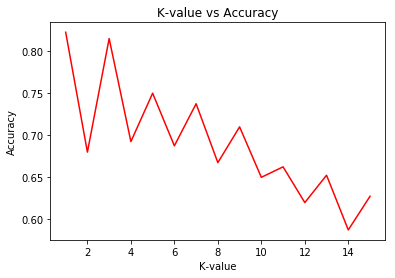

In [10]:
k = []
acc = []

for K in range(15):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    ac = metrics.accuracy_score(y_actual,y_pred)
    k.append(K_value)
    acc.append(ac)
    print("Accuracy is ", ac*100,"% for K-Value:",K_value)

plt.plot(k,acc, color='red')
plt.title('K-value vs Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.savefig('acc_k.png',dpi=100)

